In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("/content/zomato_restaurants_in_India.csv")
df.head()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


**Data Cleaning**

In [5]:
df.sample(5)

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
86870,18735909,Shekhawati Pavitra Bhojnalaya,['Quick Bites'],https://www.zomato.com/jaipur/shekhawati-pavit...,"52, Lane 3, Kailash Puri Colony, Milap Nagar, ...",Jaipur,10,Tonk Road,26.856423,75.799997,...,1,Rs.,"['Lunch', 'Cash', 'No Alcohol Available', 'Tak...",3.0,Average,10,0,0.0,-1,-1
126795,18696899,Kari Kanji,['Quick Bites'],https://www.zomato.com/madurai/kari-kanji-kk-n...,"158, Outpost, Alagar Kovil Road, Thallakulam, ...",Madurai,11295,KK Nagar,9.937023,78.137077,...,2,Rs.,"['No Alcohol Available', 'Cash', 'Debit Card',...",3.7,Buono,109,3,0.0,-1,-1
21961,57177,High Ultra Lounge,['Lounge'],https://www.zomato.com/bangalore/high-ultra-lo...,"26/1, 31st Floor, Dr. Rajkumar Road, World Tra...",Bangalore,4,Sheraton Grand Bangalore Hotel at Brigade Gateway,13.011336,77.554604,...,4,Rs.,"['Cash', 'Credit Card', 'Debit Card', 'Dinner'...",4.2,Very Good,5054,3059,0.0,-1,-1
203727,18953052,Domino's Pizza,['Quick Bites'],https://www.zomato.com/vellore/dominos-pizza-k...,"Ground Floor, Kiosk at Silver Jubilee Tower, V...",Vellore,11330,Katpadi,12.955867,79.136987,...,2,Rs.,"['Dinner', 'Delivery', 'Credit Card', 'Lunch',...",3.2,Average,14,4,0.0,-1,-1
131939,18699258,Prax Restaurant,['Quick Bites'],https://www.zomato.com/manipal/prax-restaurant...,"Vishal Complex, VP Nagar, Vidyaratna Nagar, Ma...",Manipal,11299,Vidyaratna Nagar,13.349244,74.782928,...,2,Rs.,"['Lunch', 'Cash', 'Takeaway Available', 'Debit...",4.0,Very Good,97,3,0.0,1,-1


In [8]:
print(f"numbers of columns: {df.shape[1]}\nnumbers of rows: {df.shape[0]}")

numbers of columns: 26
numbers of rows: 211944


check duplicates

In [9]:
df.duplicated().sum()

np.int64(151527)

Drop duplicates

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(60417, 26)

In [12]:
# To check Redunant Data
df['res_id'].nunique()

55568

In [13]:
df.drop_duplicates('res_id',keep='first',inplace=True)

In [14]:
print(f"Number of Columns: {df.shape[1]} \nNumber of Rows: {df.shape[0]}")

Number of Columns: 26 
Number of Rows: 55568


* After removing duplicates now we have 55568 rows out of 211944 rows



Set the resturant id(res_id) as index

In [15]:
df.set_index('res_id',inplace=True)

**Check data types and non-null values**

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55568 entries, 3400299 to 3201138
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  55568 non-null  object 
 1   establishment         55568 non-null  object 
 2   url                   55568 non-null  object 
 3   address               55550 non-null  object 
 4   city                  55568 non-null  object 
 5   city_id               55568 non-null  int64  
 6   locality              55568 non-null  object 
 7   latitude              55568 non-null  float64
 8   longitude             55568 non-null  float64
 9   zipcode               10945 non-null  object 
 10  country_id            55568 non-null  int64  
 11  locality_verbose      55568 non-null  object 
 12  cuisines              55098 non-null  object 
 13  timings               54565 non-null  object 
 14  average_cost_for_two  55568 non-null  int64  
 15  price_range     

In [21]:
df['currency'].head(1)

,currency
res_id,
3400299,Rs.


In [20]:
df['timings'].head(1)

,timings
res_id,
3400299,8:30am – 10:30pm (Mon-Sun)


Check Null values using Heatmap

<Axes: ylabel='res_id'>

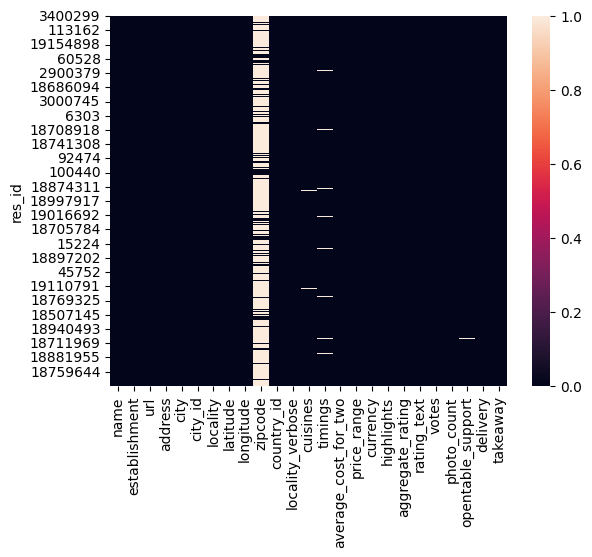

In [22]:
sns.heatmap(df.isna())

* Zip code, timings,opentable_support,cuisines,address have null values





In [30]:
x=(df.isnull().sum()*100/df.shape[0]).round(2).to_frame(name='Missing value Percentage')
x[x['Missing value Percentage']!=0]

,Missing value Percentage
address,0.03
zipcode,80.30
cuisines,0.85
timings,1.80
opentable_support,0.02


**Statistical Analysis**

In [31]:
df.describe().round(2)

,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,55568.00,55568.00,55568.00,55568.0,55568.00,55568.00,55568.00,55568.00,55568.00,55556.0,55568.00,55568.0
mean,3409.50,21.45,76.50,1.0,528.21,1.71,2.96,223.33,160.97,0.0,-0.35,-1.0
std,5174.94,42.90,10.98,0.0,595.03,0.88,1.46,618.22,586.98,0.0,0.93,0.0
min,1.00,0.00,0.00,1.0,0.00,1.00,0.00,-18.00,0.00,0.0,-1.00,-1.0
25%,8.00,16.52,74.65,1.0,200.00,1.00,2.90,6.00,1.00,0.0,-1.00,-1.0
50%,26.00,22.47,77.11,1.0,350.00,1.00,3.50,35.00,10.00,0.0,-1.00,-1.0
75%,11294.00,26.75,79.83,1.0,600.00,2.00,3.90,175.00,69.00,0.0,1.00,-1.0
max,11354.00,10000.00,91.83,1.0,30000.00,4.00,4.90,42539.00,17702.00,0.0,1.00,-1.0


In [34]:
df['establishment'].unique()

array(["['Quick Bites']", "['Casual Dining']", "['Bakery']", "['Café']",
       "['Dhaba']", "['Bhojanalya']", "['Bar']", "['Sweet Shop']",
       "['Fine Dining']", "['Food Truck']", "['Dessert Parlour']",
       "['Lounge']", "['Pub']", "['Beverage Shop']", "['Kiosk']",
       "['Paan Shop']", "['Confectionery']", '[]', "['Shack']",
       "['Club']", "['Food Court']", "['Mess']", "['Butcher Shop']",
       "['Microbrewery']", "['Cocktail Bar']", "['Pop up']",
       "['Irani Cafe']"], dtype=object)

- Remove [' '] Frrom establishment columns


In [35]:
x="['Quick Bites']"
x

"['Quick Bites']"

In [39]:
x[2:-2]

'Quick Bites'

In [41]:
df['establishment']=df['establishment'].apply(lambda x : x[2:-2])

In [42]:
df['establishment'].unique()

array(['Quick Bites', 'Casual Dining', 'Bakery', 'Café', 'Dhaba',
       'Bhojanalya', 'Bar', 'Sweet Shop', 'Fine Dining', 'Food Truck',
       'Dessert Parlour', 'Lounge', 'Pub', 'Beverage Shop', 'Kiosk',
       'Paan Shop', 'Confectionery', '', 'Shack', 'Club', 'Food Court',
       'Mess', 'Butcher Shop', 'Microbrewery', 'Cocktail Bar', 'Pop up',
       'Irani Cafe'], dtype=object)

- Replace " " to N/A

In [43]:
df['establishment']=df['establishment'].apply(lambda x: np.where(x=='',"NA",x))

In [47]:
df['establishment'].unique()

array(['Quick Bites', 'Casual Dining', 'Bakery', 'Café', 'Dhaba',
       'Bhojanalya', 'Bar', 'Sweet Shop', 'Fine Dining', 'Food Truck',
       'Dessert Parlour', 'Lounge', 'Pub', 'Beverage Shop', 'Kiosk',
       'Paan Shop', 'Confectionery', 'NA', 'Shack', 'Club', 'Food Court',
       'Mess', 'Butcher Shop', 'Microbrewery', 'Cocktail Bar', 'Pop up',
       'Irani Cafe'], dtype=object)

**Fill the missing values**

In [48]:
df['zipcode'].fillna('others',inplace=True)

In [49]:
df['zipcode'].isnull().sum()

np.int64(0)

In [58]:
df[df['establishment'] == "NA"].shape[0]

1830

In [59]:
df['establishment'].replace("NA","Other establishments",inplace=True)

**Data Analysis**

top 15 cities

In [66]:
top_15_cities=df['city'].value_counts().head(15).reset_index()
top_15_cities.head()

,city,count
0,Bangalore,2247
1,Mumbai,2022
2,Pune,1843
3,Chennai,1827
4,New Delhi,1704


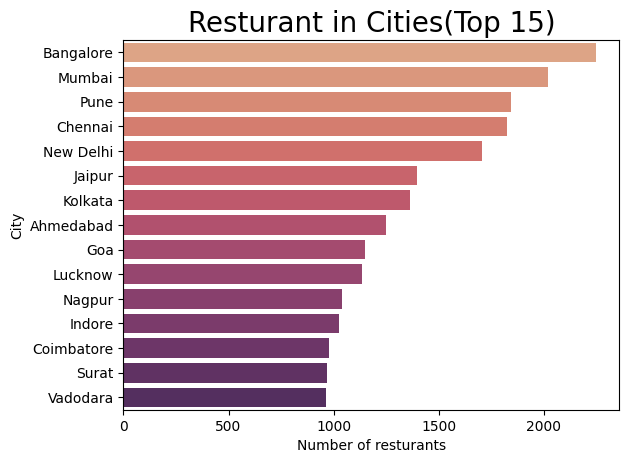

In [76]:
sns.barplot(data=top_15_cities,x='count',y='city',hue='city',palette="flare")
plt.title("Resturant in Cities(Top 15)",fontsize=20)
plt.ylabel("City")
plt.xlabel("Number of resturants")
plt.show()

The bar graph showing top 15 cities ranked by number of resturant-
- Bangalure ,Mubai have the heighest number of resturants

**bottom 10 cities**

In [72]:
bottom_10_cities=df['city'].value_counts().tail(10).reset_index()
bottom_10_cities.head()

,city,count
0,Gandhinagar,96
1,Ghaziabad,90
2,Secunderabad,90
3,Nasik,83
4,Faridabad,79


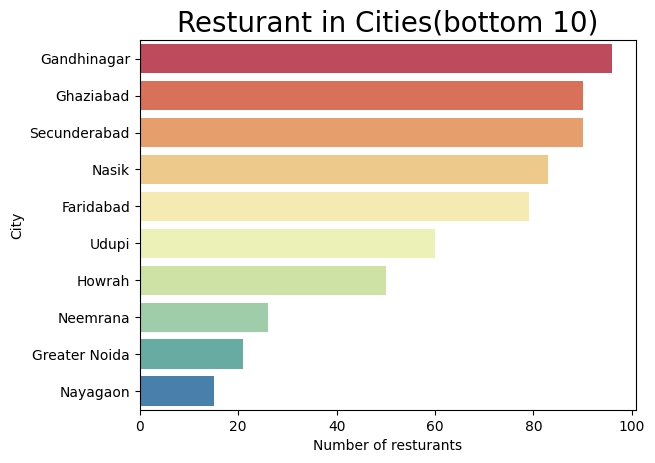

In [74]:
sns.barplot(data=bottom_10_cities,x='count',y='city',hue='city',palette='Spectral')
plt.title("Resturant in Cities(bottom 10)",fontsize=20)
plt.ylabel("City")
plt.xlabel("Number of resturants")
plt.show()

- Nayagaon and Greater Noida has less resturant

**Top Resturant**

In [77]:
top_20_resturant_name=df['name'].value_counts().head(20).reset_index()
top_20_resturant_name.head()

,name,count
0,Domino's Pizza,399
1,Cafe Coffee Day,315
2,KFC,204
3,Baskin Robbins,202
4,Keventers,189


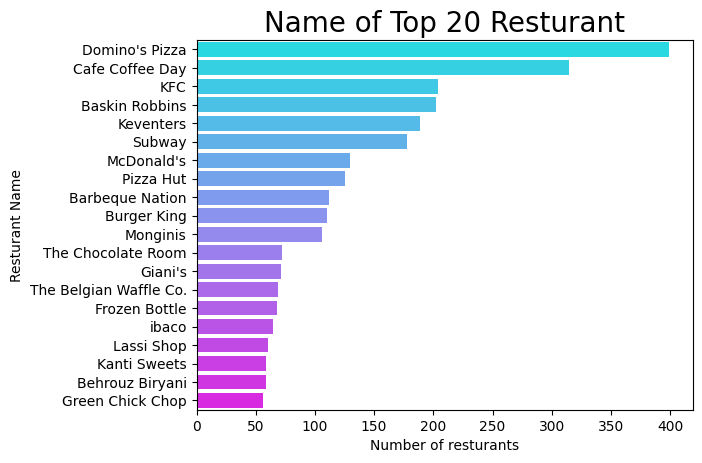

In [80]:
sns.barplot(data=top_20_resturant_name,x='count',y='name',hue='name',palette='cool')
plt.title("Name of Top 20 Resturant",fontsize=20)
plt.ylabel("Resturant Name",fontsize=10)
plt.xlabel("Number of resturants",fontsize=10)
plt.show()

From the above graph
- Domino's pizza has highest numbers of outlets 390+
- Cafe coffee day has 300+ outlets

**less outlets**

In [82]:
bottom_10_resturant_name=df['name'].value_counts().tail(10).reset_index()
bottom_10_resturant_name.head(10)

,name,count
0,Pandit Zayka,1
1,Raj Bhoj,1
2,Bhukhaa,1
3,Snacks & Shakes,1
4,Ashok Hotel,1
5,Boulevard 69,1
6,7-Eleven Restaurant,1
7,Food station,1
8,Silver Saloon - Taj Usha Kiran Palace,1
9,The Road Chef,1


- most of the bottom resturtant have 1 outlets

**top establishment type**

In [84]:
top_10_establishment_type=df['establishment'].value_counts().head(10).reset_index()
top_10_establishment_type.head()

,establishment,count
0,Quick Bites,14032
1,Casual Dining,12270
2,Café,4123
3,Bakery,3741
4,Dessert Parlour,3675


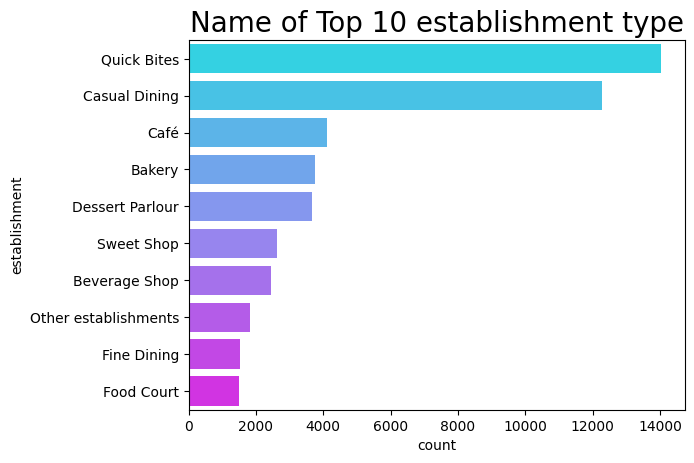

In [89]:
sns.barplot(data=top_10_establishment_type,y='establishment',x='count',hue='establishment',palette='cool')
plt.title("Name of Top 10 establishment type",fontsize=20)
plt.show()

- The graph provides a comparison of different types of restaurant establishments, highlighting the dominance of quick bites and casual dining options.

**Top Resturant By Cusinies Type**

In [90]:
by_cusines = df['cuisines'].value_counts().head(10).reset_index()
by_cusines.head()

,cuisines,count
0,North Indian,4295
1,Fast Food,2025
2,"North Indian, Chinese",1636
3,Bakery,1585
4,South Indian,1489


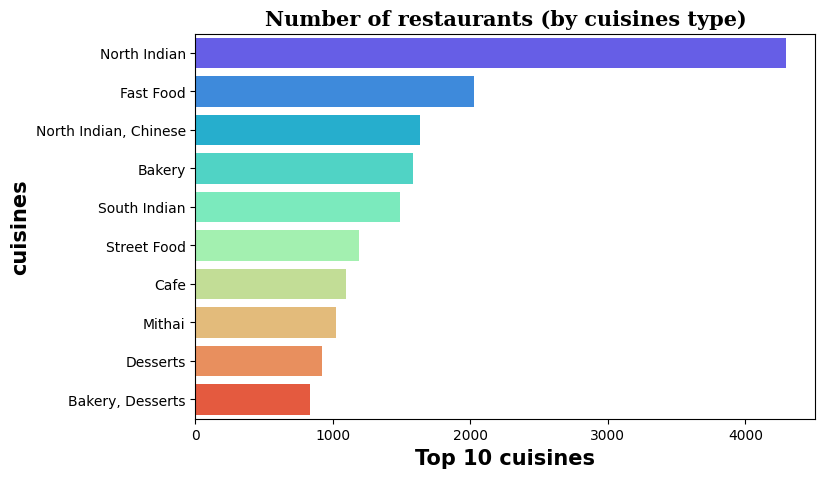

In [91]:
plt.figure(figsize=(8,5))
sns.barplot(y='cuisines',x='count',data=by_cusines,palette='rainbow')

plt.title('Number of restaurants (by cuisines type)',fontsize=15,fontweight='bold', fontfamily='serif')
plt.xlabel("Top 10 cuisines",fontsize=15,fontweight='bold')
plt.ylabel("cuisines" ,fontsize=15,fontweight='bold')
plt.show()

From the above Graph-
- North Indian cuisine has the highest number of restaurants around 4500+ which is followed by Fast Food 2000+ and a combination of North Indian, Chinese cuisines 1800+.

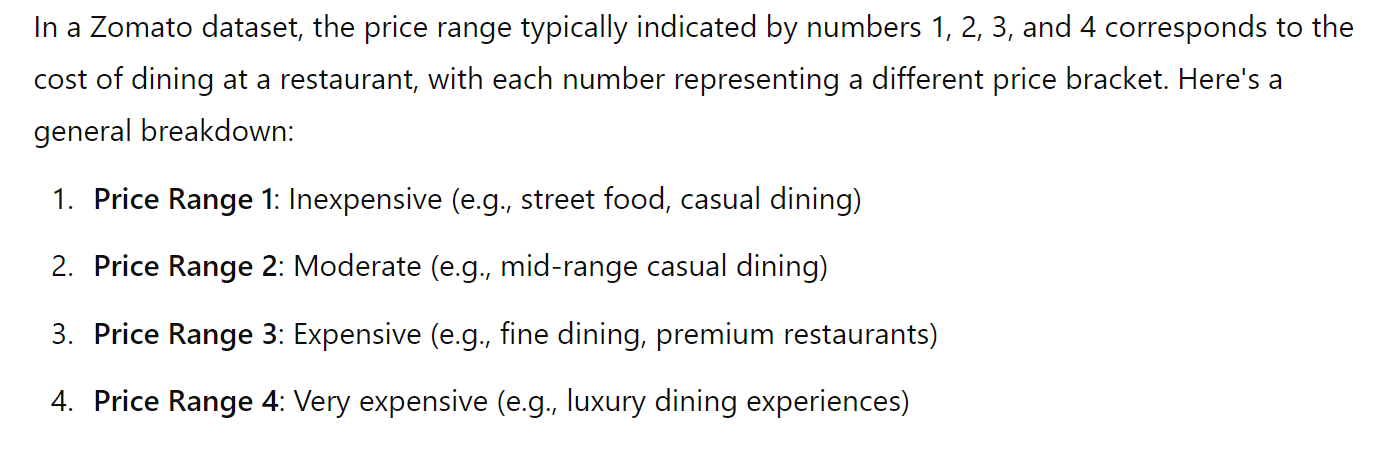

In [93]:
df['price_range'].unique()

array([2, 1, 3, 4])

In [94]:
df['price_range'].value_counts().reset_index()

,price_range,count
0,1,28818
1,2,16582
2,3,7370
3,4,2798


**Price Range values for average_cost_for_two**

In [100]:
p1max = df[df['price_range'] == 1]['average_cost_for_two'].max()
p2max = df[df['price_range'] == 2]['average_cost_for_two'].max()
p3max = df[df['price_range'] == 3]['average_cost_for_two'].max()
p4max = df[df['price_range'] == 4]['average_cost_for_two'].max()

p1min = df[df['price_range'] == 1]['average_cost_for_two'].min()
p2min = df[df['price_range'] == 2]['average_cost_for_two'].min()
p3min = df[df['price_range'] == 3]['average_cost_for_two'].min()
p4min = df[df['price_range'] == 4]['average_cost_for_two'].min()
print(p1max,p2max,p3max,p4max)
print(p1min,p2min,p3min,p4min)

450 999 1900 30000
0 250 500 1000


assume minimum price 50 for inexpensive

In [107]:
prices=pd.DataFrame({ 'Price_category':[1,2,3,4],
              'Price Range':['50-450','250-999','500-1900','1000-30000']},index=range(1,5))
prices


,Price_category,Price Range
1,1,50-450
2,2,250-999
3,3,500-1900
4,4,1000-30000


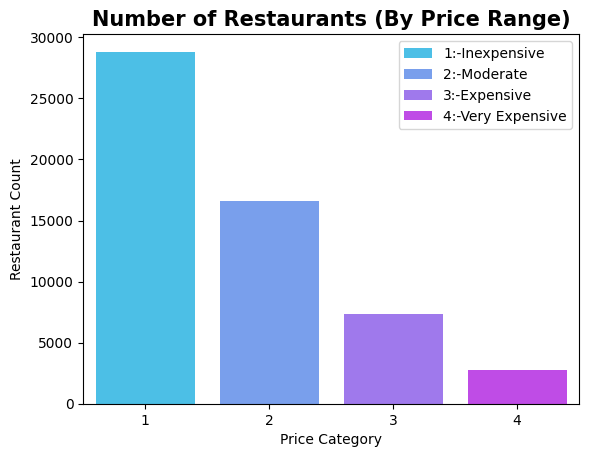

In [108]:
sns.countplot(x='price_range',data=df,palette='cool')
plt.title('Number of Restaurants (By Price Range)',fontsize=15,fontweight='bold')
plt.xlabel('Price Category')
plt.ylabel('Restaurant Count')
plt.legend(['1:-Inexpensive','2:-Moderate','3:-Expensive','4:-Very Expensive'])
plt.show()

- The graph displays a number of Restaurants categorized by Price Range Price category 1 (50-450) has the highest number of restaurants among the 4 categories around 28000+ restaurants are in category one price range .it shows the cosumer spending in restaurants all over the India.
-As the price range increases, the number of restaurants decreases, its indicating that fewer consumers are willing or able to spend higher amounts on dining out.

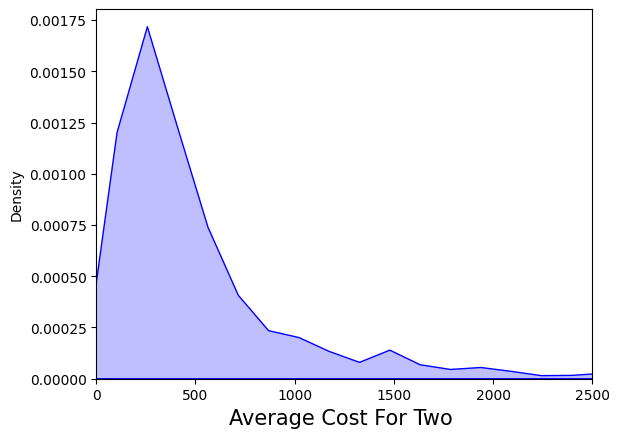

In [124]:
sns.kdeplot(df["average_cost_for_two"],shade=True,color = 'blue')
plt.xlim(0,2500)
plt.xlabel('Average Cost For Two ',fontsize=15)
plt.show()

- The Kde plot shows the distribuition of average resturant costs for two persons.The peak around 450-650 indicates the mid range pricing for meal for two person.its means that most of the person prefer mid range pricing resturant

**Luxury resturant name,city**

In [119]:
expensive_res=df.groupby(['name','establishment','city'])['average_cost_for_two'].max().sort_values(ascending=False).head(15).reset_index()
expensive_res

,name,establishment,city,average_cost_for_two
0,Ocean - The Private Dining Room - Sahara Star,Fine Dining,Mumbai,30000
1,Bhairo,Fine Dining,Udaipur,15000
2,Gol Bungalow - Taj Falaknuma Palace,Fine Dining,Hyderabad,15000
3,Fly Dining,Fine Dining,Bangalore,14000
4,Trophy Bar- Umaid Bhawan Palace,Bar,Jodhpur,12000
5,Risala- Umaid Bhawan Palace,Fine Dining,Jodhpur,12000
6,Pillars - Umaid Bhawan Palace,Fine Dining,Jodhpur,12000
7,Wasabi By Morimoto - The Taj Mahal Palace,Fine Dining,Mumbai,10000
8,Orient Express - Taj Palace,Fine Dining,New Delhi,8000
9,Yuuka - The St. Regis Mumbai,Fine Dining,Mumbai,8000


In the table shows Top 15 expensive resturant-
- The most expensive resturant is **Ocean - The Private Dining Room - Sahara Star**
-The difference between First and second most expensive restaurant is twice 2x
- On the basis of establishment types 13 are the fine dining and rest 2 is bar type.

**ratings**

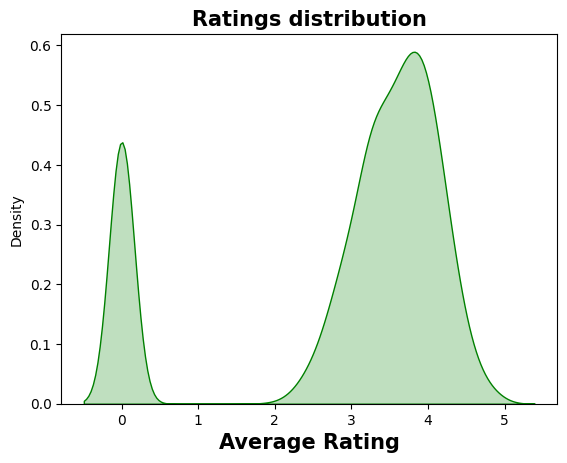

In [125]:
sns.kdeplot(df['aggregate_rating'],shade=True,color='green')
plt.title("Ratings distribution",fontsize=15,fontweight='bold')
plt.xlabel("Average Rating",fontsize=15,fontweight='bold')
plt.show()

From the above Graph
- There is spike on **0** it might be newly resturant or unrated
- most of the resturant rated between 3.5 to 4.2

**RelationShip Between Price range and ratings**

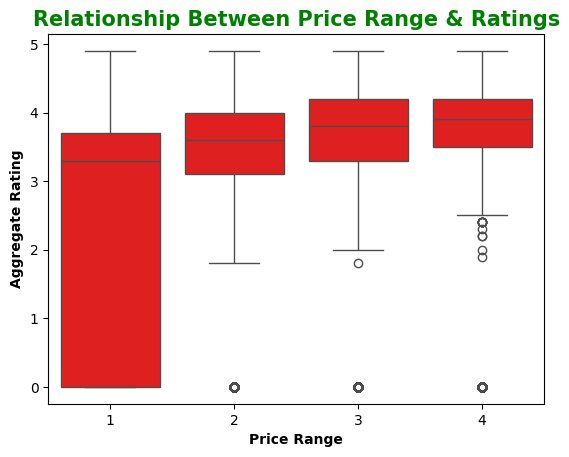

In [161]:
sns.boxplot(x='price_range', y='aggregate_rating', data=df,color='red')
plt.title("Relationship Between Price Range & Ratings",fontsize=15,fontweight='bold',color = 'g')
plt.xlabel("Price Range",fontsize=10,fontweight='bold')
plt.ylabel("Aggregate Rating",fontsize=10,fontweight='bold')
plt.show()

From the above Graph-
- restaurants in the lowest price category 1 (50-450) have the highest average rating , around 3.5 on the rating scale
- as the Price range incrasinge the count of aggregate ragting is decreasing

In [134]:
df['highlights'].unique()

array(["['Lunch', 'Takeaway Available', 'Credit Card', 'Dinner', 'Cash', 'Air Conditioned', 'Indoor Seating', 'Pure Veg']",
       "['Delivery', 'No Alcohol Available', 'Dinner', 'Takeaway Available', 'Lunch', 'Cash', 'Indoor Seating']",
       "['No Alcohol Available', 'Dinner', 'Takeaway Available', 'Breakfast', 'Lunch', 'Cash', 'Delivery', 'Outdoor Seating', 'Air Conditioned', 'Self Service', 'Indoor Seating', 'Digital Payments Accepted', 'Pure Veg', 'Desserts and Bakes']",
       ...,
       "['Dinner', 'Delivery', 'Cash', 'Takeaway Available', 'Free Parking', 'Digital Payments Accepted', 'Pure Veg', 'Indoor Seating']",
       "['Dinner', 'Cash', 'Takeaway Available', 'Lunch', 'Delivery', 'Free Parking', 'Indoor Seating', 'Air Conditioned', 'Outdoor Seating', 'Digital Payments Accepted', 'Catering Available', 'Pure Veg']",
       "['Dinner', 'Cash', 'Takeaway Available', 'Debit Card', 'Delivery', 'Credit Card', 'Free Parking', 'Outdoor Seating']"],
      dtype=object)

In [137]:
def check( list):
  if "Delivery" in list:
    return "Delivery Available"
  elif 'Takeaway Available' in list:
    return 'Takeaway Available'
  else:
    return 'No Delivery Available'

In [138]:
df_for_highlight=df['highlights'].apply(check)

In [142]:
z=df_for_highlight.value_counts().reset_index()
z

,highlights,count
0,Takeaway Available,24769
1,Delivery Available,23907
2,No Delivery Available,6892


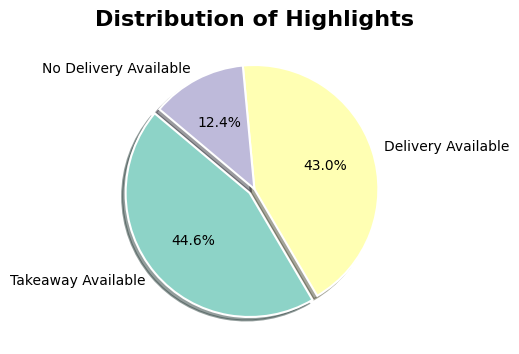

In [148]:
import matplotlib.pyplot as plt

# Bigger figure
plt.figure(figsize=(4,6))

# Custom colors (optional)
colors = plt.cm.Set3(range(len(z)))   # You can try 'tab20c', 'viridis', etc.

# Explode effect (highlight largest slice)
explode = [0.05 if val == z['count'].max() else 0 for val in z['count']]

# Pie chart
plt.pie(
    z['count'],
    labels=z['highlights'],
    autopct='%1.1f%%',
    startangle=140,     # rotate for balance
    colors=colors,
    explode=explode,
    shadow=True,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.5}
)

# Title
plt.title("Distribution of Highlights", fontsize=16, fontweight="bold")

plt.show()


- The slice labelled with “no delivery Available” accounts for 12.4% of restaurants. Are no providing takeaways and delivery services maybe these restaurants are in the category of most expensive restaurants.

**Using world cloud**

In [154]:
from wordcloud import WordCloud

In [153]:
text=" ".join(df['highlights'])

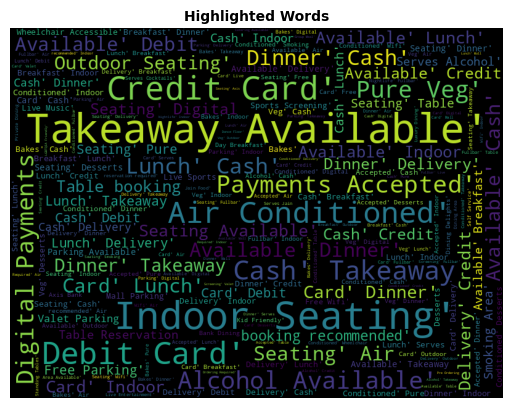

In [160]:
wc=WordCloud(width=800,height=600,background_color="black").generate(text)
plt.imshow(wc)
plt.title('Highlighted Words',fontsize=10,fontweight='bold')
plt.axis('off')
plt.show()

**Word Cloud** is the visual representation of words which show most frequently used ones and highlighted those words the word cloud. It is used for to identifying key topics, data Exploration The above Word cloud shows the highlighted words like Takeaway, Debit card, Indoor Seating, Cash, debit card, credit card, pure veg. outdoor seating Over all its highlight the variety of services offered by the restaurant to make it a convenient dining option for customers.

**Conclusion**
- Analyzed the dataset to uncover insights about the restaurant landscape in India.
- Identified the top 20 cities and most popular cuisines.
- Examined various price categories and their relationship with restaurant types.
- Highlighted the most expensive restaurants.
- Analyzed service availability, including takeaway and delivery options.
- Provided a comprehensive understanding of the Indian restaurant industry.
- Revealed significant patterns and trends regarding geographic distribution, establishment types, cuisines, and pricing structures.